In [150]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [63]:
X_train = pd.DataFrame(data=[[10, 6, 12],
                             [11, 4, 9],
                             [8, 5, 10],
                             [3, 3, 2.5],
                             [2, 2.8, 1.3],
                             [1, 1, 2]], columns=['Gene 1', 'Gene 2', 'Gene 3'])
X_train.index += 1

- Mice 4, 5, 6 have relatively low values
- Mice 3, 1, 2 have relatively high values.

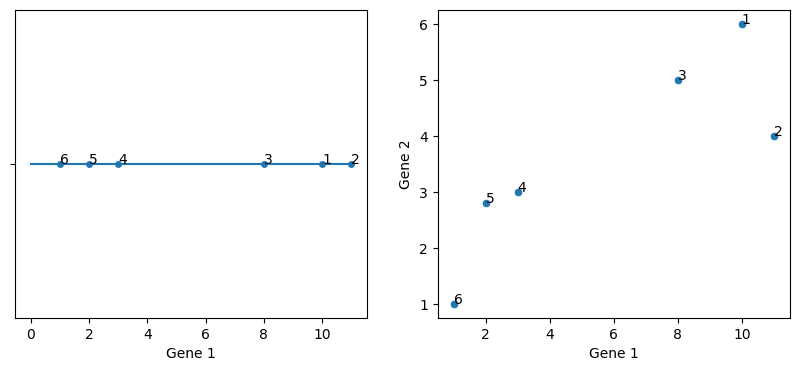

In [127]:
# Plot Gene 1 and Gene
def isolate():
    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # Plot Gene 1
    sns.stripplot(data=X_train, x="Gene 1", jitter=False, ax=axes[0])
    sns.lineplot(x=[0,11], y=[0,0], ax=axes[0])
    for gene_1, mouse_id in zip(X_train['Gene 1'], X_train.index):
        axes[0].text(x=gene_1, y=0, s=mouse_id)

    # Plot Gene 1 and Gene 2
    sns.scatterplot(data=X_train, x="Gene 1", y="Gene 2", ax=axes[1])
    for gene_1, gene_2, mouse_id in zip(X_train['Gene 1'], 
                                        X_train['Gene 2'], 
                                        X_train.index):
        axes[1].text(x=gene_1, y=gene_2, s=mouse_id)

isolate()

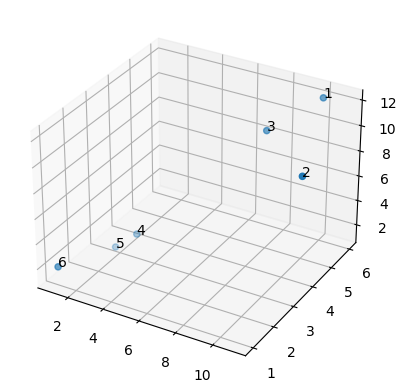

In [136]:
# Plot Gene 1, Gene 2, Gene 3
def isolate():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')

    # Plot Gene 1, Gene 2, Gene 3
    ax.scatter(xs=X_train['Gene 1'], ys=X_train['Gene 2'], zs=X_train['Gene 3'])
    for gene_1, gene_2, gene_3, mouse_id in zip(X_train['Gene 1'], 
                                                X_train['Gene 2'], 
                                                X_train['Gene 3'], X_train.index):
        ax.text(x=gene_1, y=gene_2, z=gene_3, s=mouse_id)

isolate()

In [155]:
# Plot Gene 1, Gene 2, Gene 3
def isolate():
    fig = px.scatter_3d(data_frame=X_train, x='Gene 1', y='Gene 2', z='Gene 3')
    fig.show()

isolate()

In [149]:
# PCA
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X=X_train)

# Calculate the PC variation.
# PCA1 accounts for 95% of the total variation around the PCs
# PCA2 accounts for 3% of the total variation around the PCs
# PCA3 accounts for 1% of the total variation around the PCs
# Total Variation is Variation of PC1 + Variation of PC2 + Variation of PC3
# Variation of PC1 is SS(distance of PC1) / (n - 1)
# SS(distance of PC1) is sum squared distance of PC1
# i.e SS(distance of PC1) = d1^2 + d2^2 + ... + dn^2
print(pca.explained_variance_ratio_)

# Calculate the singular value for PC
# Singular Value for PC1 is 14.5
# Singular Value for PC1 is square root of Eigenvalue for PC1
# Eigen value for PC1 is SS(distance of PC1)
print(pca.singular_values_)

[0.95750948 0.03061939 0.01187113]
[14.56982676  2.60544038  1.62229113]
